In [8]:
import yfinance as yf  # Importing the yfinance library to fetch financial data
import pandas as pd  # Importing pandas for data manipulation
from prophet import Prophet  # Importing the Prophet library for time series forecasting
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Importing metrics for evaluation
from datetime import datetime  # Importing datetime to handle date objects


In [9]:
# Fetch Bitcoin data
today = datetime.now().strftime("%Y-%m-%d")  # Getting today's date in 'YYYY-MM-DD' format
btc_data = yf.download('BTC-USD', start='2018-01-01', end=today)  # Download Bitcoin price data from 2018 to today
btc_data = btc_data[['Close']].reset_index()  # Resetting index and keeping only the 'Close' price

# Check and clean missing data
btc_data.dropna(inplace=True)  # Dropping any rows with missing values

# Prepare data format for Prophet
btc_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)  # Renaming columns for Prophet

# Split the data into the last 30 days for testing
train_data = btc_data[:-30]  # Training data (all data except the last 30 days)
test_data = btc_data[-30:]    # Test data (last 30 days)

[*********************100%***********************]  1 of 1 completed


In [10]:
# Create and fit the Prophet model
model = Prophet(yearly_seasonality=True, daily_seasonality=True)  # Create a Prophet model with yearly and daily seasonality
model.fit(train_data)  # Fit the model to the training data

# Create future dates for prediction
future = model.make_future_dataframe(periods=7)  # Creating a dataframe for the next 7 days for prediction

# Make predictions
forecast = model.predict(future)  # Generate forecasts for future dates

# Compare predicted values with actual test data
predicted_values = forecast['yhat'].iloc[-7:].values  # Extract the predicted values for the last 7 days
actual_values = test_data['y'].iloc[-7:].values  # Extract the actual values from the test data


22:59:11 - cmdstanpy - INFO - Chain [1] start processing
22:59:12 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
# Calculate error metrics
mae = mean_absolute_error(actual_values, predicted_values)  # Calculate Mean Absolute Error
mse = mean_squared_error(actual_values, predicted_values)  # Calculate Mean Squared Error
r2 = r2_score(actual_values, predicted_values)  # Calculate R² Score

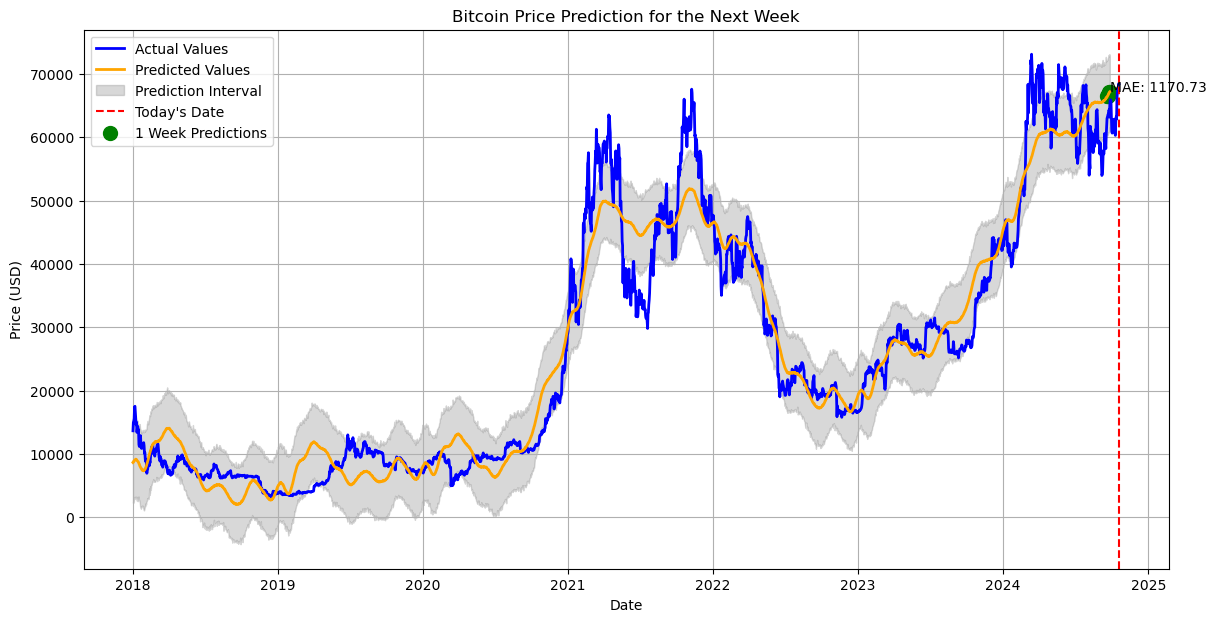

Last 7 Day Prediction Results:
             ds          yhat    yhat_lower    yhat_upper
2454 2024-09-20  66447.798503  60470.619175  72156.641546
2455 2024-09-21  66564.619936  60296.580891  72475.086398
2456 2024-09-22  66674.480660  60740.272312  72670.816914
2457 2024-09-23  66880.047291  60827.102835  72983.725501
2458 2024-09-24  66921.980862  60759.913182  72689.721967
2459 2024-09-25  67112.593285  61525.940577  73082.923319
2460 2024-09-26  67165.863714  61053.773331  72728.400530

Mean Absolute Error (MAE): 1170.73
Mean Squared Error (MSE): 2463045.05
R² Score: 0.23

Last Day Closing Price: 68362.73 USD (Date: 2024-10-19)


In [13]:
# Get the last closing price and date
last_date = test_data['ds'].iloc[-1]  # Last date in the test data
last_close = test_data['y'].iloc[-1]  # Last closing price in the test data

# Visualize the results
plt.figure(figsize=(14, 7))  # Create a new figure with a specified size

# Plot actual values
plt.plot(btc_data['ds'], btc_data['y'], label='Actual Values', color='blue', linewidth=2)  # Plotting actual closing prices

# Plot predicted values
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Values', color='orange', linewidth=2)  # Plotting predicted prices

# Show confidence intervals
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.3, label='Prediction Interval')  # Filling the area between lower and upper bounds of predictions

# Indicate today's date on the plot
plt.axvline(x=pd.to_datetime(today), color='red', linestyle='--', label='Today\'s Date')  # Drawing a vertical line for today's date
plt.scatter(forecast['ds'].iloc[-7:], predicted_values, color='green', label='1 Week Predictions', s=100)  # Scatter plot for the predicted values

# Display error metrics on the plot
plt.text(forecast['ds'].iloc[-1], predicted_values[-1], f'MAE: {mae:.2f}', horizontalalignment='left', fontsize=10, color='black')  # Adding text for MAE on the plot

plt.title('Bitcoin Price Prediction for the Next Week')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Price (USD)')  # Y-axis label
plt.legend()  # Displaying the legend
plt.grid()  # Adding a grid to the plot
plt.show()  # Show the plot

# Print the last 7 days of forecast results
print("Last 7 Day Prediction Results:")  # Printing a header for the prediction results
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7))  # Displaying the last 7 days of predictions with confidence intervals

# Print error metrics
print(f'\nMean Absolute Error (MAE): {mae:.2f}')  # Printing Mean Absolute Error
print(f'Mean Squared Error (MSE): {mse:.2f}')  # Printing Mean Squared Error
print(f'R² Score: {r2:.2f}')  # Printing R² Score

# Print the last day's closing price
print(f'\nLast Day Closing Price: {last_close:.2f} USD (Date: {last_date.date()})')  # Printing the last day's closing price and date
